In [1]:
import numpy as np
import math
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import scipy.linalg

In [2]:
def symmetric_generator(n):
    a = np.random.randn(n, n)
    return np.tril(a) + np.tril(a, -1).T

In [3]:
def vec_mod(n):
    return math.sqrt(sum([i ** 2 for i in n]))

In [4]:
def numpy_eig(a):
    w, v = np.linalg.eigh(a)
    return w, v

In [5]:
def power_eig(a, iterations, epsilon):
    x = np.random.rand(a.shape[0])
    x = x / np.linalg.norm(x)
    i = 0
    while (i < iterations):
        xtmp = x
        y = a @ x
        y_norm = np.linalg.norm(y)
        x = y / y_norm
        l = np.transpose(x) @ a @ x
        #l = rayleigh_fun(a, x)
        if 2 - vec_mod(xtmp - x) < epsilon:
            break
        i += 1
    return l, x, i    

In [6]:
def power_eig_ray(a, iterations, epsilon):
    x = np.random.rand(a.shape[0])
    x = x / np.linalg.norm(x)
    i = 0
    while (i < iterations):
        xtmp = x
        y = a @ x
        y_norm = np.linalg.norm(y)
        x = y / y_norm
        l = rayleigh_fun(a, x)
        if 2 - vec_mod(xtmp - x) < epsilon:
            break
        i += 1
    return l, x, i    

In [7]:
def inverse_eig(a, iterations, epsilon):
    x = np.random.rand(a.shape[0])
    x = x / np.linalg.norm(x)
    i = 0
    (lu, piv) = scipy.linalg.lu_factor(a)
    while (i < iterations):
        xtmp = x
        w = scipy.linalg.lu_solve((lu, piv), x)
        # w = x @ np.linalg.inv(a) 
        x = w / np.linalg.norm(w)
        l = np.transpose(x) @ a @ x
        
        if 2 - vec_mod(x - xtmp) < epsilon:
            break
        i += 1
    return l, x, i   

In [28]:
def inverse_eig_2(a, iterations, epsilon, par):
    b  = a - par * np.diag(np.ones(a.shape[0]))
    (lu, piv) = scipy.linalg.lu_factor(b)
    
    x = np.random.rand(a.shape[0])
    x = x / np.linalg.norm(x)
    i = 0
    
    while (i < iterations):
        xtmp = x
        w = scipy.linalg.lu_solve((lu, piv), x)
        x = w / np.linalg.norm(w)
        l = np.transpose(x) @ a @ x
        if 2 - vec_mod(xtmp - x) < epsilon:
            break
        i += 1
    return l, x, i  
    

In [9]:
def rayleigh_fun(a, x):
    xt = np.transpose(x)
    return (xt @ a @ x) / (xt @ x)

In [39]:
def rayleigh_eig(a, iterations, epsilon, par):
    
    l = par
    x = np.random.rand(a.shape[0])
    x = x / np.linalg.norm(x)
    i = 0
    
    while (i < iterations):
        b  = a - l * np.diag(np.ones(a.shape[0]))
        (lu, piv) = scipy.linalg.lu_factor(b)
        xtmp = x
        w = scipy.linalg.lu_solve((lu, piv), x)
        x = w / np.linalg.norm(w)
        l = rayleigh_fun(a, x)
        print(vec_mod(xtmp - x))
        if 2 - vec_mod(xtmp - x) < epsilon:
            break
        i += 1
    return l, x, i  
    

#### Symetryczna macierz liczb rzeczywistych

In [34]:
a = symmetric_generator(5)
print(a)

[[-2.00506775  0.08794489 -0.48697064  0.61862895 -0.42916488]
 [ 0.08794489  0.41300251  1.43252769 -0.0109158  -1.36291189]
 [-0.48697064  1.43252769 -1.18938769  0.39050264  0.47330118]
 [ 0.61862895 -0.0109158   0.39050264 -0.55107142 -0.81718674]
 [-0.42916488 -1.36291189  0.47330118 -0.81718674 -1.62821036]]


#### Funkcja numpy.linalg.eigh

In [35]:
w, v = numpy_eig(a)

for i in range(len(w)):
    print(w[i], v[:,i])

-3.28802706523 [-0.17371107  0.44368621 -0.5403372   0.30421747  0.62326114]
-2.38069845116 [ 0.8877992   0.08567911  0.1537078  -0.1557313   0.39571878]
-0.95193985092 [-0.19124118 -0.24322563  0.6601387   0.52952748  0.43368842]
0.0147279326062 [ 0.37823393 -0.21852421 -0.32037897  0.74864783 -0.38219105]
1.64520273006 [-0.04475439 -0.82999403 -0.3820783  -0.20573419  0.347558  ]


In [40]:
l, u, i = rayleigh_eig(a, 1000, 0.000001, 2.5)
print(l,u,i)

1.854260036216331
0.7840746341552383
0.3721711737980181
0.04971570991049466
0.00012930558211026125
2.0
1.64520273006 [ 0.04475439  0.82999403  0.3820783   0.20573419 -0.347558  ] 5


#### Sprawdzenie

In [17]:
v @ np.diag(w) @ np.transpose(v) # Tw o symetrycznym zadaniu własnym

array([[ 0.80680522, -0.34377878,  0.56246442, -1.25021971, -0.02430196],
       [-0.34377878, -0.35700979,  0.75214482,  0.06776954,  0.52439478],
       [ 0.56246442,  0.75214482, -0.38196549, -1.30242637, -0.25719017],
       [-1.25021971,  0.06776954, -1.30242637,  0.69729541,  0.11617929],
       [-0.02430196,  0.52439478, -0.25719017,  0.11617929, -0.52247984]])

#### Power Iteration

In [41]:
l0, u1, i = power_eig(a, 1000, 0.00000001)
print (l0, u1)
print(i)

-3.28802690478 [-0.17333771  0.44372223 -0.54027251  0.30415196  0.62342748]
25


#### Inverse Iteration - A ** (-1)

In [19]:
l1, u1, i = inverse_eig(a, 1000, 0.00000001)
print(l1, u1, i)

-0.23943555386 [ 0.53128121  0.23989522 -0.25163694  0.25123536  0.7305821 ] 13


#### Inverse Iteration - eigenvalue closest to par

In [29]:
par = -1.1
l2, u2, i = inverse_eig_2(a, 1000, 0.0000001, par)
print(l2, u2)
print(i)

-0.853371940737 [ 0.41698561  0.35585807  0.27147663  0.5882824  -0.52887833]
1000


#### Size vs Time

In [30]:
size = [10, 50, 100, 300, 500, 750, 1000]
time = [0, 0, 0, 0, 0, 0, 0]
for j in range(3):
    for i in range(len(size)):
        a = symmetric_generator(size[i])    
        start = timer()
        l, u, it = power_eig(a, 1000, 0.000001)
        end = timer()
        time[i] += it#(end - start)
time = [i/3 for i in time]

time2 = [0, 0, 0, 0, 0, 0, 0]
for j in range(3):
    for i in range(len(size)):
        a = symmetric_generator(size[i])    
        start = timer()
        l, u, it = power_eig_ray(a, 1000, 0.000001)
        end = timer()
        time2[i] += it#(end - start)
time2 = [i/3 for i in time2]

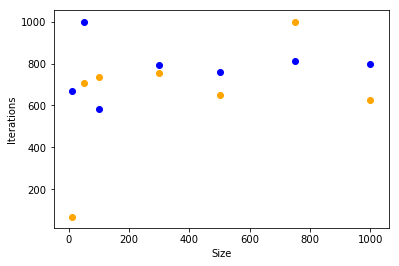

In [31]:
plt.scatter(size, time, color='blue')
plt.scatter(size, time2, color='orange')
plt.xlabel('Size')
plt.ylabel('Iterations')
plt.show()

#### Rayleigh Quotient

In [ ]:
def rayleigh_eig(a, epsilon)

In [ ]:
function x = rayleigh(A, epsilon, mu, x)
  x = x / norm(x);
  % the backslash operator in Octave solves a linear system
  y = (A - mu * eye(rows(A))) \ x; 
  lambda = y' * x;
  mu = mu + 1 / lambda
  err = norm(y - lambda * x) / norm(y)

  while err > epsilon
    x = y / norm(y);
    y = (A - mu * eye(rows(A))) \ x;
    lambda = y' * x;
    mu = mu + 1 / lambda
    err = norm(y - lambda * x) / norm(y)
  end

end